In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

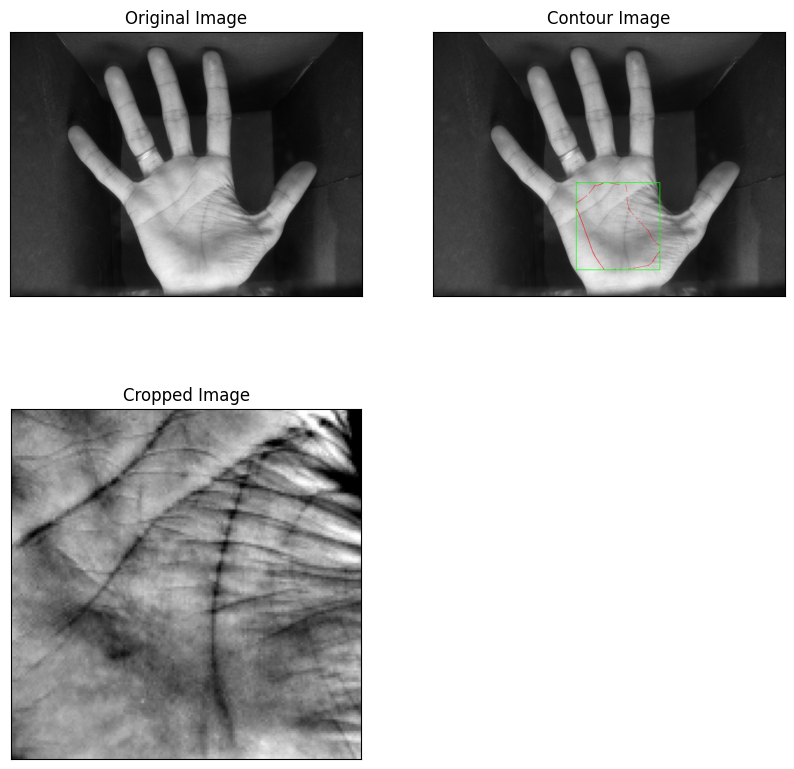

In [10]:
img_original = cv2.imread('../../IITD Palmprint V1/Left Hand/001_1.JPG', cv2.IMREAD_GRAYSCALE)

img = img_original.copy()
blur = cv2.GaussianBlur(img,(3,3),0)

# Thresholding the image
_, th = cv2.threshold(blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Applying Morphological operators for smoothing out the image
kernal = np.ones((5,5), dtype=np.uint8)
grad = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernal, iterations=5)
ret, grad = cv2.threshold(grad, 0, 255, cv2.THRESH_TOZERO)



# APPLYING WATERSHED ALGORITHM
dist_transform = cv2.distanceTransform(grad, cv2.DIST_L2, 5)

ret, sure = cv2.threshold(dist_transform, 0.50*dist_transform.max(), 255, 0)

grad2 = cv2.morphologyEx(sure, cv2.MORPH_OPEN, kernal, iterations=3)

grad3 = cv2.dilate(grad2, kernal, iterations=3)

grad3 = np.uint8(grad3)

# ret, markers = cv2.connectedComponents(grad3)

contours, heirarchy = cv2.findContours(grad3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img_c = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_cnt = cv2.drawContours(img_c, contours[0], -1, (255,0,0), 2)


# Finding the bounding rectangle
x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(img_c,(x,y),(x+w,y+h),(0,255,0),2)

# Saving the image
# cv2.imwrite('../ROI_extracted.jpg',img_c)

# Crop the image
img_cropped = img_original[y:y+h, x:x+w]
img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_GRAY2BGR)

# make darker areas more darker
img_cropped = cv2.addWeighted(img_cropped, 4, cv2.GaussianBlur(img_cropped, (0,0), 30), -4, 128)
img_cropped = cv2.resize(img_cropped, (150,150))

# Displaying the images
plt.figure(figsize=(10,10))
plt.subplot(2,2,1), plt.imshow(img_original, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(img_c, cmap='gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(img_cropped, cmap='gray')
plt.title('Cropped Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
img_cropped.shape

(150, 150, 3)